<a href="https://colab.research.google.com/github/Sanj420/TyreXpert-AI/blob/main/TyreXpert_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("gauravduttakiit/tyre-quality-classification")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tyre-quality-classification


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Use the downloaded path
dataset_path = "/root/.cache/kagglehub/datasets/gauravduttakiit/tyre-quality-classification/versions/1"

# See folders/files
print("Folders in dataset:", os.listdir(dataset_path))


Folders in dataset: ['train', 'test']


In [ ]:
train_path = os.path.join(dataset_path, "train")
print("Classes inside train folder:", os.listdir(train_path))


Classes inside train folder: ['defective', 'good']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import os


In [ ]:


# Define paths
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

# Image generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
test_gen = ImageDataGenerator(rescale=1./255)

# Load training & validation data
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(448 , 448),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load test data
test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(448, 448),
    batch_size=32,
    class_mode='binary'
)


Found 1188 images belonging to 2 classes.
Found 296 images belonging to 2 classes.
Found 372 images belonging to 2 classes.


In [ ]:
# Load base model
base_model = MobileNetV2(include_top=False, input_shape=(448, 448, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


<ipython-input-62-c1024064cd95>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_shape=(448, 448, 3), weights='imagenet')


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 14, 14, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15 # you can increase to 10–20 later
)






Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8023 - loss: 0.4055 - val_accuracy: 0.8209 - val_loss: 0.3789
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9110 - loss: 0.2148 - val_accuracy: 0.8142 - val_loss: 0.4023
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9307 - loss: 0.1588 - val_accuracy: 0.8311 - val_loss: 0.3834
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9550 - loss: 0.1325 - val_accuracy: 0.8480 - val_loss: 0.3401
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9462 - loss: 0.1284 - val_accuracy: 0.8514 - val_loss: 0.3333
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9641 - loss: 0.0942 - val_accuracy: 0.8682 - val_loss: 0.3015
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9599 - loss: 0.0952 - val_accuracy: 0.7872 - val_loss: 0.5577
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9679 - loss: 0.0743 - val_accuracy: 0.8277 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 748ms/step - accuracy: 0.8913 - loss: 0.3503
Test Accuracy: 0.8897849321365356


In [ ]:
model.save("tyre_good_defective_model.keras")


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
uploaded = files.upload()


Saving good (10).jpg to good (10).jpg


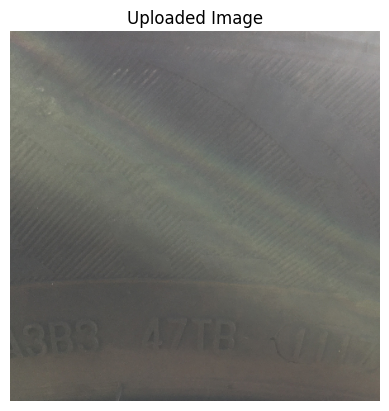

In [ ]:
image_path = list(uploaded.keys())[0]  # get uploaded filename

# Load and preprocess the image
img = load_img(image_path, target_size=(448, 448))  # exact training size
img_array = img_to_array(img)
img_array = preprocess_input(img_array)  # same normalization as training
img_array = np.expand_dims(img_array, axis=0)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


In [ ]:
model = load_model("tyre_good_defective_model.keras")  # or .h5 if you used that


In [ ]:
prediction = model.predict(img_array)

if prediction[0][0] >= 0.5:
    print("Prediction: 🚨 Defective Tyre")
else:
    print("Prediction: ✅ Good Tyre")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: 🚨 Defective Tyre
